# Tugas Fisika Material Komputasi

Arif Tia Diva
22/503229/PA/21616

Diketahui Fungsi respon dari material dalam domain waktu diberikan oleh persamaan berikut:
$$
G(t) = \frac{1}{m} exp \left( \frac{-bt}{2m} \right) sin \left( \frac{\sqrt{4mk-b^2}}{2m}t\right)
$$
untuk $t>0$ (karena prinsip kausalitas).  Sketsa pers. (1) dapat diberikan oleh gambar 1:
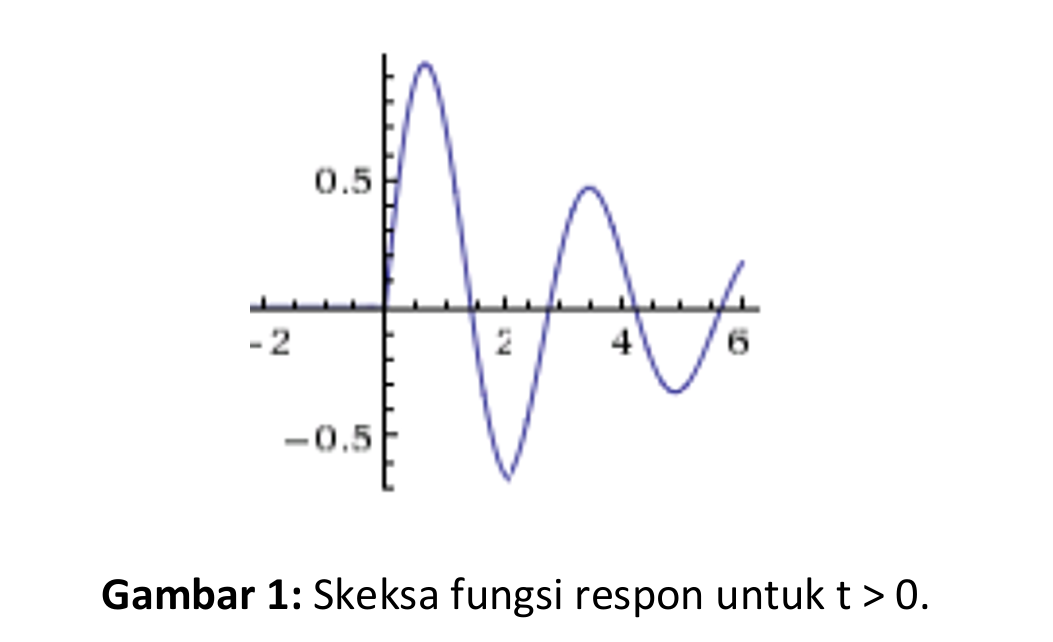 

- Dengan menggunakan pers.(1) plotlah fungsi respon dalam domain waktu ini untuk ∆𝑡=0.1 𝜋 
periode (𝑇=3𝜋), 𝑏=𝑚=1 , dan 𝑘=2.

Jumlah data: 30


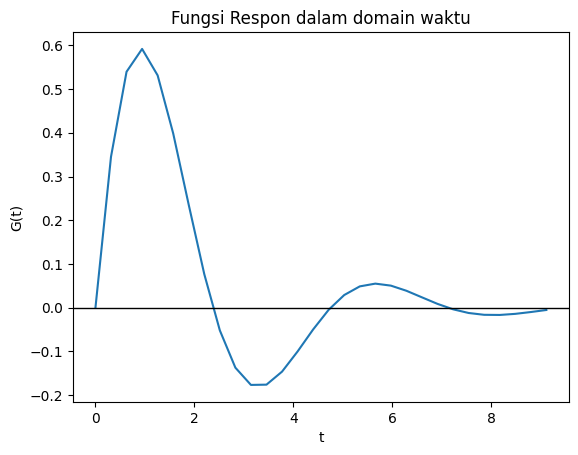

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Variabel
dt = 0.1 * np.pi
T = 3 * np.pi
b = 1
m = 1
k = 2

# array data
t = np.arange(0, T, dt)   # start=0, end=T, step=dt

#melihat jumlah data
print(f'Jumlah data: {len(t)}') 

# Fungsi Respon dalam domain waktu
def fungsi_respon_waktu(t):
    return (1/m) * np.exp(-b*t/(2*m)) * np.sin(np.sqrt(4*m*k-b**2)/(2*m)*t)

# menghitung fungsi respon
G_t = fungsi_respon_waktu(t)

# ploting grafik
plt.plot(t, G_t)
plt.title('Fungsi Respon dalam domain waktu')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('t')
plt.ylabel('G(t)')
plt.show()

-  Ubahlah fungsi respon (pers.1) kedalam domain frekuensi dengan menghitung bagian real  dan 
imajiner dari G($\omega$) dengan input pers. (1). Plotlah kurva bagian real dan imajiner G($\omega$) tersebut). 
Bandingkanlah hasil yang diperoleh dengan hasil analitiknya yang diberikan oleh persamaan:
$$
G(\omega) = \frac{1}{m} \frac{\left( \frac{k}{m} - \omega^2 - i \frac{b \omega}{m} \right)}{\left( \frac{k}{m} - \omega^2 \right)^2 + \left( \frac{\omega b}{m} \right)^2}

$$
- (Gunakanlah Teorema Nijquist untuk men-set domain frekuensinya).

Nijquist Theorem
$$
\Delta \omega = \frac{\pi}{T}
$$

$$
W_0 = \frac{\pi}{2(\Delta t)}
$$

Transformasi Fourier diskrit (DFT)

$$
\chi(\omega_k) = \sum_{t_j = -N}^{t_j = N} g(t_j) e^{-i \omega_k t_j \Delta t} 
= \sum_{t_j = -N}^{t_j = N} \left[ g(t_j) \cos(\omega_k t_j) - i g(t_j) \sin(\omega_k t_j) \right] \Delta t
$$

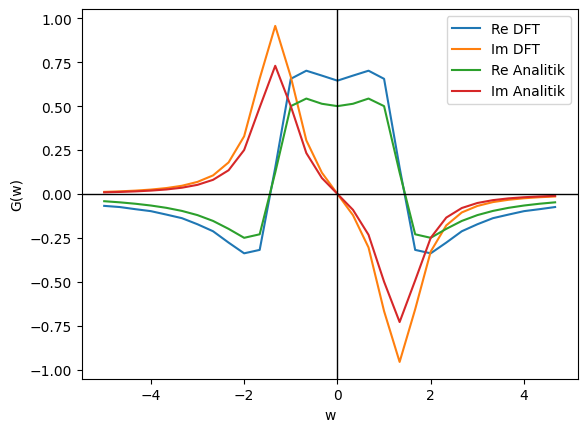

In [78]:
# from scipy.fft import fft, fftfreq

#Nijquist Theorem
dw = np.pi / T
W_0 = np.pi / (2*dt)
w = np.arange(-W_0, W_0, dw)  # start=-W_0, end=W_0, step=dw

t_dft = np.arange(0, T, dt) 
#pada pdf materi harusnya dari -T sampai T namun hasilnya error sehingga dibuat dari 0 sampai T

#fungsi analitik
def G_w_analitik_real(omega):
    return (1/m) * ((k/m)-omega**2) / (((k/m)-omega**2)**2+((b*omega)/m)**2)

def G_w_analitik_imaginer(omega):
    return (1/m) * (((-b*omega)/m)) / (((k/m)-omega**2)**2+((b*omega)/m)**2)

#perhitungan dengan DFT
def G_w_dft_real(omega):
    G_w_real = 0
    for i in range(len(t_dft)):
        G_w_real += fungsi_respon_waktu(t_dft[i]) * np.cos(omega*t_dft[i]) * dt
    return G_w_real

def G_w_dft_imaginer(omega):
    G_w_imaginer = 0
    for i in range(len(t_dft)):
        G_w_imaginer += -fungsi_respon_waktu(t_dft[i]) * np.sin(omega*t_dft[i]) * dt
    return G_w_imaginer

analitik_real = G_w_analitik_real(w)
analitik_imaginer = G_w_analitik_imaginer(w)

hasil_dft_real = G_w_dft_real(w)
hasil_dft_imaginer = G_w_dft_imaginer(w)

# # menggunakan fungsi FFT dari scipy
# G_w_fft = fft(G_t)
# plt.plot(w, G_w_fft.real, label='Re FFT')
# plt.plot(w, G_w_fft.imag, label='Im FFT')

#plotting grafik
plt.plot(w, hasil_dft_real, label='Re DFT')
plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, analitik_real,label='Re Analitik')
plt.plot(w,analitik_imaginer, label='Im Analitik')
plt.axhline(y=0, color='black', lw=1)
plt.axvline(x=0, color='black', lw=1)
plt.xlabel('w')
plt.ylabel('G(w)')
plt.legend()
plt.show()

Transformasi Kramers-Kronig (TKK)
$$
\chi'(\omega) = \frac{P}{\pi} \int_{-\infty}^{\infty} \frac{\chi''(\omega')\, d\omega'}{\omega' - \omega}
$$

$$
\chi''(\omega) = -\frac{P}{\pi} \int_{-\infty}^{\infty} \frac{\chi'(\omega')\, d\omega'}{\omega' - \omega}
$$

dengan $P$ merupakan Nilai Cauchy untuk menghindari pembagian dengan 0

- Verifikasilah bagian imajiner dari G($\omega$) dengan melakukan Transformasi Kramers-Kronig (metode  
Integral) pada bagian real dari G($\omega$) yang diperoleh dari perhitungan sebelumnya.  

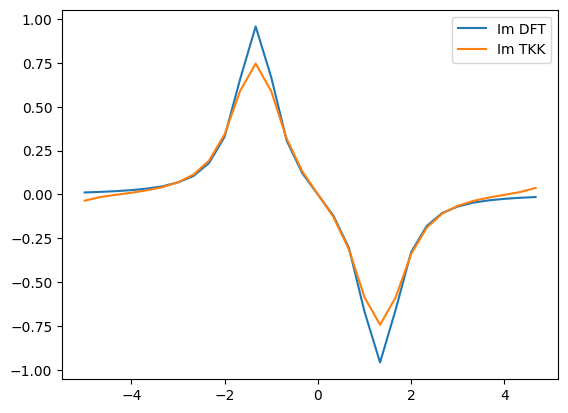

In [75]:
# Transformasi Kramers-Kronig dari Real ke Imaginer

def TKK_real_to_img(G_w_real):
    G_w_imaginer = np.zeros(len(w))
    for i in range(len(w)):
        sum = 0
        for k in range(len(w)):
            if i == k:
                sum += 0
            else:
                sum += dw * G_w_real[k] / (w[i] - w[k])
        G_w_imaginer[i] = (-1/np.pi) * sum
    return G_w_imaginer



TKK_Imaginer = TKK_real_to_img(hasil_dft_real)

plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, TKK_Imaginer, label='Im TKK')
plt.legend()
plt.show()

- Verifikasilah bagian real dari G($\omega$) dengan melakukan Transformasi Kramers-Kronig (metode  
Integral) pad bagian imajiner dari G($\omega$) yang diperoleh dari perhitungan sebelumnya. 

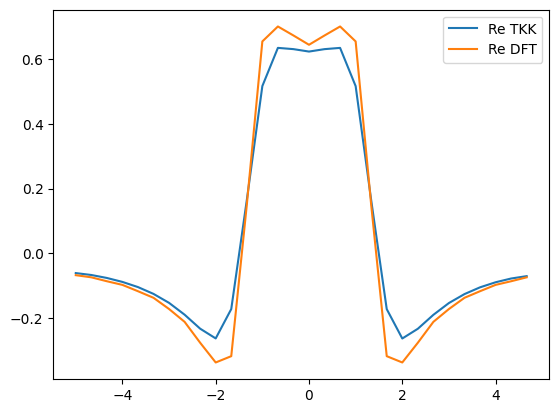

In [69]:
# Transformasi Kramers-Kronig dari Imaginer ke Real

def TKK_img_to_real(G_w_imaginer):
    G_w_real = np.zeros(len(w))
    for i in range(len(w)):
        sum = 0
        for k in range(len(w)):
            if i == k:
                sum += 0
            else:
                sum += dw * G_w_imaginer[k] / (w[i] - w[k])
        G_w_real[i] = (1/np.pi) * sum
    return G_w_real

TKK_Real = TKK_img_to_real(hasil_dft_imaginer)



plt.plot(w, TKK_Real,label='Re TKK')
plt.plot(w, hasil_dft_real, label='Re DFT')
plt.legend()
plt.show()

- Lakukanlah komputasi pada soal (a) – (d) untuk nilai parameter-parameter berikut : untuk ∆𝑡=
 0.05 𝜋 periode (𝑇=3𝜋), 𝑏=𝑚=1 , dan 𝑘=2. 

Jumlah data: 60


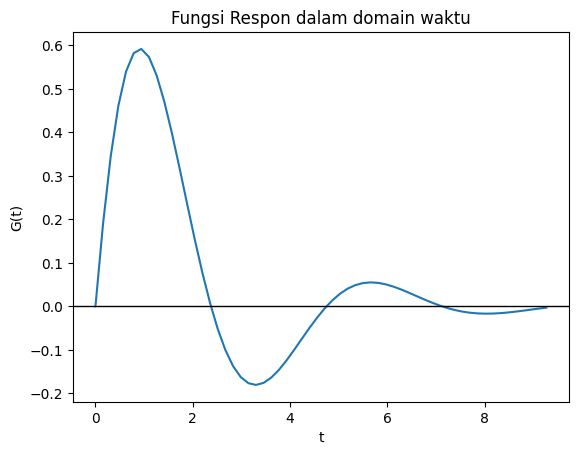

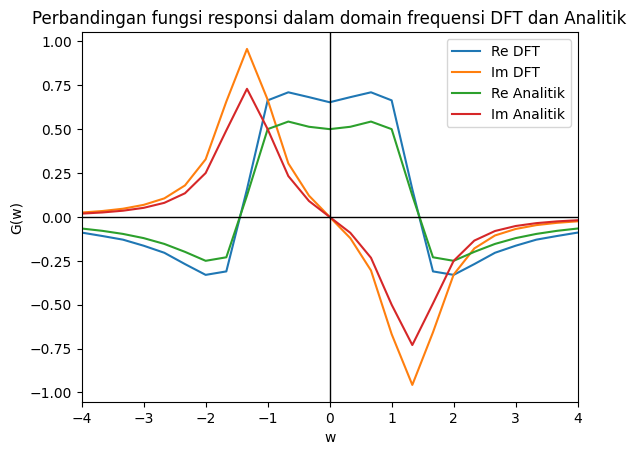

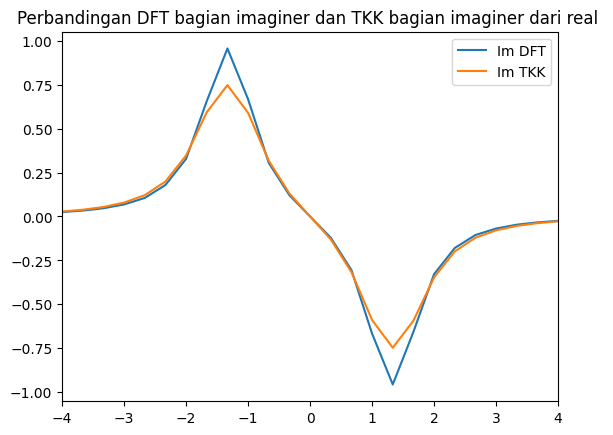

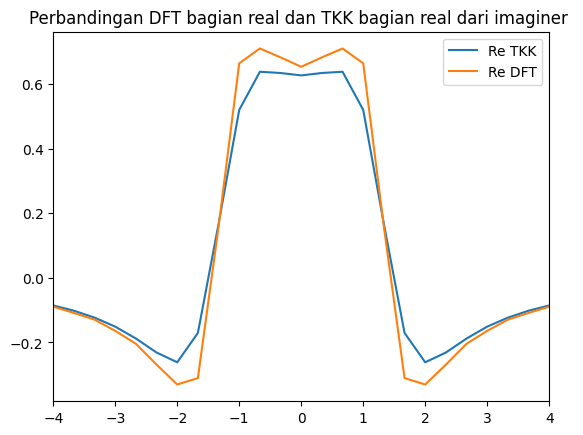

In [83]:
# Variabel
dt = 0.05 * np.pi
T = 3 * np.pi
b = 1
m = 1
k = 2

# array data
t = np.arange(0, T, dt)   # start=0, end=T, step=dt

#melihat jumlah data
print(f'Jumlah data: {len(t)}') 


# menghitung fungsi respon
G_t = fungsi_respon_waktu(t)

# ploting grafik
plt.plot(t, G_t)
plt.title('Fungsi Respon dalam domain waktu')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('t')
plt.ylabel('G(t)')
plt.show()

#Nijquist Theorem
dw = np.pi / T
W_0 = np.pi / (2*dt)
w = np.arange(-W_0, W_0, dw) 

t_dft = np.arange(0, T, dt) 


analitik_real = G_w_analitik_real(w)
analitik_imaginer = G_w_analitik_imaginer(w)

hasil_dft_real = G_w_dft_real(w)
hasil_dft_imaginer = G_w_dft_imaginer(w)

plt.plot(w, hasil_dft_real, label='Re DFT')
plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, analitik_real,label='Re Analitik')
plt.plot(w,analitik_imaginer, label='Im Analitik')
plt.title('Perbandingan fungsi responsi dalam domain frequensi DFT dan Analitik')
plt.axhline(y=0, color='black', lw=1)
plt.axvline(x=0, color='black', lw=1)
plt.xlabel('w')
plt.ylabel('G(w)')
plt.xlim(-4,4)
plt.legend()
plt.show()

TKK_Imaginer = TKK_real_to_img(hasil_dft_real)

plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, TKK_Imaginer, label='Im TKK')
plt.title('Perbandingan DFT bagian imaginer dan TKK bagian imaginer dari real ')
plt.legend()
plt.xlim(-4,4)
plt.show()

TKK_Real = TKK_img_to_real(hasil_dft_imaginer)

plt.plot(w, TKK_Real,label='Re TKK')
plt.plot(w, hasil_dft_real, label='Re DFT')
plt.title('Perbandingan DFT bagian real dan TKK bagian real dari imaginer ')
plt.legend()
plt.xlim(-4,4)
plt.show()

- Lakukanlah komputasi pada soal (a) – (d) untuk nilai parameter-parameter berikut : untuk ∆𝑡=
 0.01 𝜋 periode (𝑇=3𝜋), 𝑏=𝑚=1 , dan 𝑘=2. 

Jumlah data: 300


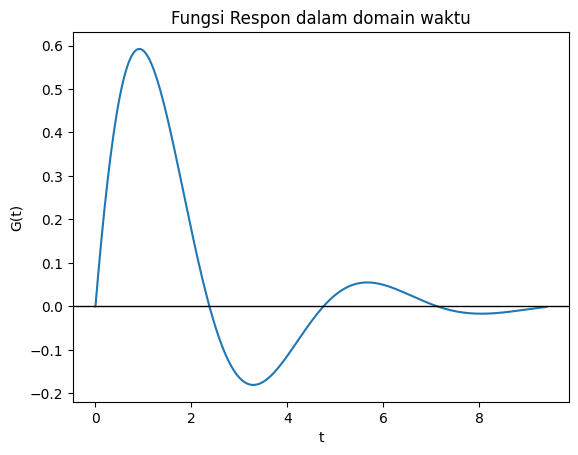

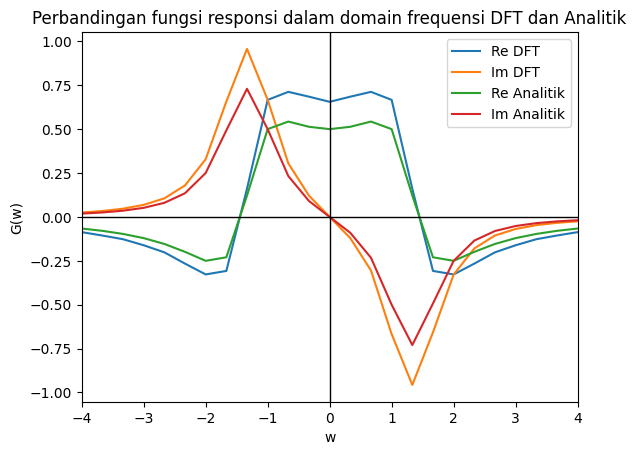

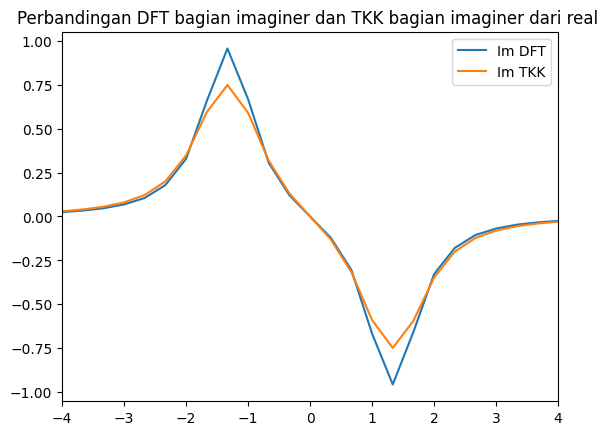

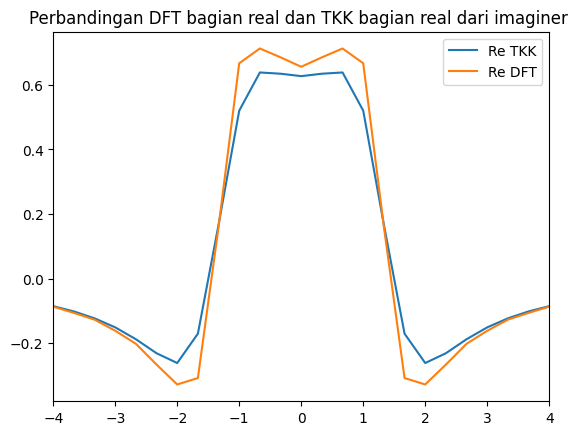

In [84]:
# Variabel
dt = 0.01 * np.pi
T = 3 * np.pi
b = 1
m = 1
k = 2

# array data
t = np.arange(0, T, dt)   # start=0, end=T, step=dt

#melihat jumlah data
print(f'Jumlah data: {len(t)}') 


# menghitung fungsi respon
G_t = fungsi_respon_waktu(t)

# ploting grafik
plt.plot(t, G_t)
plt.title('Fungsi Respon dalam domain waktu')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('t')
plt.ylabel('G(t)')
plt.show()

#Nijquist Theorem
dw = np.pi / T
W_0 = np.pi / (2*dt)
w = np.arange(-W_0, W_0, dw) 

t_dft = np.arange(0, T, dt) 


analitik_real = G_w_analitik_real(w)
analitik_imaginer = G_w_analitik_imaginer(w)

hasil_dft_real = G_w_dft_real(w)
hasil_dft_imaginer = G_w_dft_imaginer(w)

plt.plot(w, hasil_dft_real, label='Re DFT')
plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, analitik_real,label='Re Analitik')
plt.plot(w,analitik_imaginer, label='Im Analitik')
plt.title('Perbandingan fungsi responsi dalam domain frequensi DFT dan Analitik')
plt.axhline(y=0, color='black', lw=1)
plt.axvline(x=0, color='black', lw=1)
plt.xlabel('w')
plt.ylabel('G(w)')
plt.xlim(-4,4)
plt.legend()
plt.show()

TKK_Imaginer = TKK_real_to_img(hasil_dft_real)

plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, TKK_Imaginer, label='Im TKK')
plt.title('Perbandingan DFT bagian imaginer dan TKK bagian imaginer dari real ')
plt.legend()
plt.xlim(-4,4)
plt.show()

TKK_Real = TKK_img_to_real(hasil_dft_imaginer)

plt.plot(w, TKK_Real,label='Re TKK')
plt.plot(w, hasil_dft_real, label='Re DFT')
plt.title('Perbandingan DFT bagian real dan TKK bagian real dari imaginer ')
plt.legend()
plt.xlim(-4,4)
plt.show()

- Lakukanlah komputasi pada soal (a) – (d) untuk nilai parameter-parameter berikut : untuk ∆𝑡 =
 0.01 𝜋 periode (𝑇 = 3𝜋), 𝑏 = 𝑚 = 1 , dan 𝑘 = 3. 

Jumlah data: 300


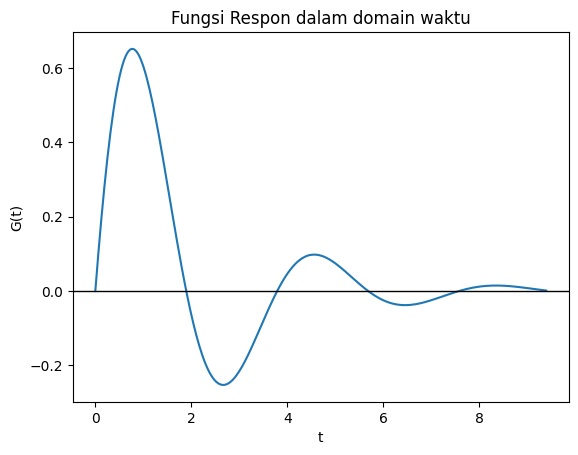

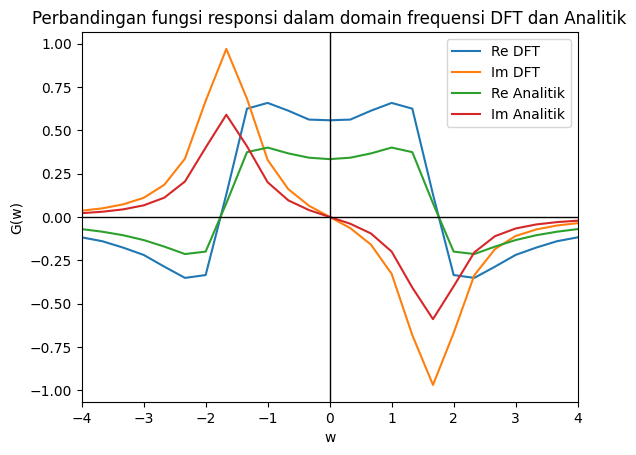

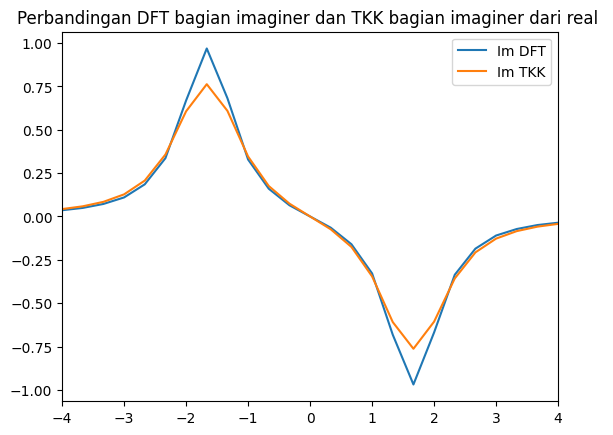

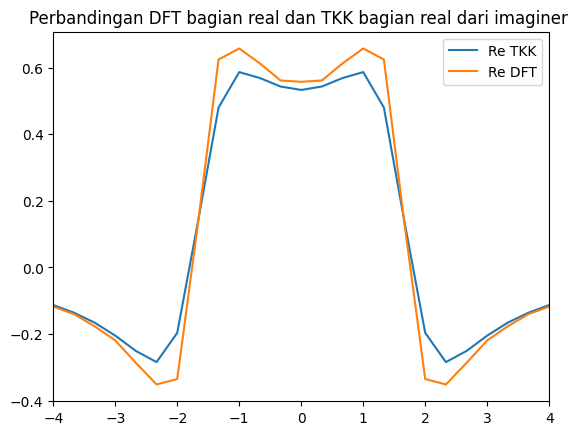

In [85]:
# Variabel
dt = 0.01 * np.pi
T = 3 * np.pi
b = 1
m = 1
k = 3

# array data
t = np.arange(0, T, dt)   # start=0, end=T, step=dt

#melihat jumlah data
print(f'Jumlah data: {len(t)}') 


# menghitung fungsi respon
G_t = fungsi_respon_waktu(t)

# ploting grafik
plt.plot(t, G_t)
plt.title('Fungsi Respon dalam domain waktu')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('t')
plt.ylabel('G(t)')
plt.show()

#Nijquist Theorem
dw = np.pi / T
W_0 = np.pi / (2*dt)
w = np.arange(-W_0, W_0, dw) 

t_dft = np.arange(0, T, dt) 


analitik_real = G_w_analitik_real(w)
analitik_imaginer = G_w_analitik_imaginer(w)

hasil_dft_real = G_w_dft_real(w)
hasil_dft_imaginer = G_w_dft_imaginer(w)

plt.plot(w, hasil_dft_real, label='Re DFT')
plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, analitik_real,label='Re Analitik')
plt.plot(w,analitik_imaginer, label='Im Analitik')
plt.title('Perbandingan fungsi responsi dalam domain frequensi DFT dan Analitik')
plt.axhline(y=0, color='black', lw=1)
plt.axvline(x=0, color='black', lw=1)
plt.xlabel('w')
plt.ylabel('G(w)')
plt.xlim(-4,4)
plt.legend()
plt.show()

TKK_Imaginer = TKK_real_to_img(hasil_dft_real)

plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, TKK_Imaginer, label='Im TKK')
plt.title('Perbandingan DFT bagian imaginer dan TKK bagian imaginer dari real ')
plt.legend()
plt.xlim(-4,4)
plt.show()

TKK_Real = TKK_img_to_real(hasil_dft_imaginer)

plt.plot(w, TKK_Real,label='Re TKK')
plt.plot(w, hasil_dft_real, label='Re DFT')
plt.title('Perbandingan DFT bagian real dan TKK bagian real dari imaginer ')
plt.legend()
plt.xlim(-4,4)
plt.show()

- Lakukanlah komputasi pada soal (a) – (d) untuk nilai parameter-parameter berikut : untuk ∆𝑡 =
 0.01 𝜋 periode (𝑇 = 3𝜋), 𝑏 = 2,𝑚 = 1 , dan 𝑘 = 3. 

Jumlah data: 300


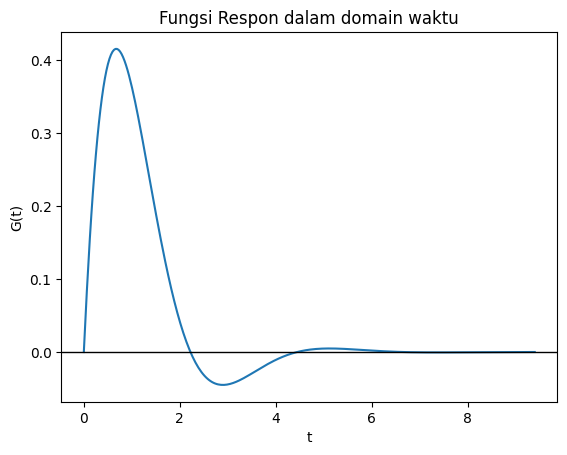

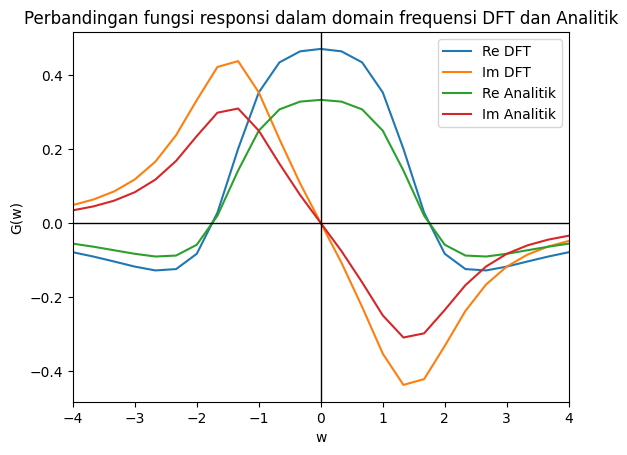

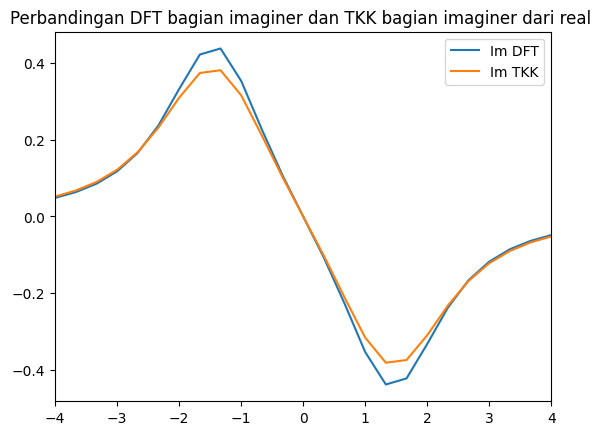

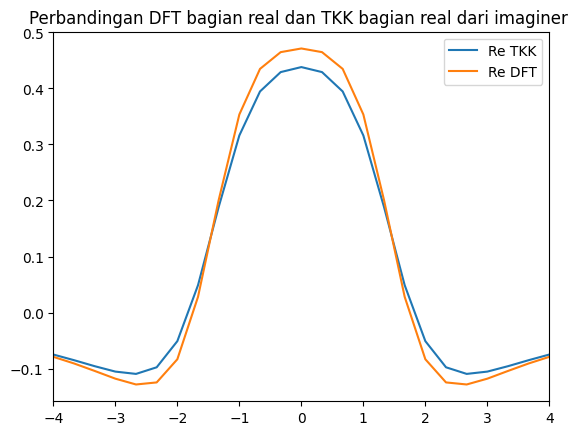

In [86]:
# Variabel
dt = 0.01 * np.pi
T = 3 * np.pi
b = 2
m = 1
k = 3

# array data
t = np.arange(0, T, dt)   # start=0, end=T, step=dt

#melihat jumlah data
print(f'Jumlah data: {len(t)}') 


# menghitung fungsi respon
G_t = fungsi_respon_waktu(t)

# ploting grafik
plt.plot(t, G_t)
plt.title('Fungsi Respon dalam domain waktu')
plt.axhline(y=0, color='black', lw=1)
plt.xlabel('t')
plt.ylabel('G(t)')
plt.show()

#Nijquist Theorem
dw = np.pi / T
W_0 = np.pi / (2*dt)
w = np.arange(-W_0, W_0, dw) 

t_dft = np.arange(0, T, dt) 


analitik_real = G_w_analitik_real(w)
analitik_imaginer = G_w_analitik_imaginer(w)

hasil_dft_real = G_w_dft_real(w)
hasil_dft_imaginer = G_w_dft_imaginer(w)

plt.plot(w, hasil_dft_real, label='Re DFT')
plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, analitik_real,label='Re Analitik')
plt.plot(w,analitik_imaginer, label='Im Analitik')
plt.title('Perbandingan fungsi responsi dalam domain frequensi DFT dan Analitik')
plt.axhline(y=0, color='black', lw=1)
plt.axvline(x=0, color='black', lw=1)
plt.xlabel('w')
plt.ylabel('G(w)')
plt.xlim(-4,4)
plt.legend()
plt.show()

TKK_Imaginer = TKK_real_to_img(hasil_dft_real)

plt.plot(w, hasil_dft_imaginer, label='Im DFT')
plt.plot(w, TKK_Imaginer, label='Im TKK')
plt.title('Perbandingan DFT bagian imaginer dan TKK bagian imaginer dari real ')
plt.legend()
plt.xlim(-4,4)
plt.show()

TKK_Real = TKK_img_to_real(hasil_dft_imaginer)

plt.plot(w, TKK_Real,label='Re TKK')
plt.plot(w, hasil_dft_real, label='Re DFT')
plt.title('Perbandingan DFT bagian real dan TKK bagian real dari imaginer ')
plt.legend()
plt.xlim(-4,4)
plt.show()